# Getting started

The main thesis behind this published resource is that children have adverse events after drug exposure not just from the disease process but also from the biological processes from their growth and development. The National Institute of Child and Human Development defines 7 stages of child development for which we estimate signals: term neonate (0-27 days), infancy (28 days-1 years), toddler (1 year-2 years), early childhood (2-5 years), middle childhood (6-11 years), early adolescence 12-17 years, and late adolescence (18-21 years). The database contains tables of drug safety signals with drug, adverse event, and biological ontologies to facilitate teasing apart influences and contributions adverse drug events during childhood.

## An Example

The package helps with identifying, retrieving, and loading the database.

Retrieve the database:

In [2]:
!curl -o ../data/effect_peds_19q2_v0.3_20211119.sqlite https://pds-database.s3.amazonaws.com/effect_peds_19q2_v0.3_20211119.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  870M  100  870M    0     0  42.2M      0  0:00:20  0:00:20 --:--:-- 39.0M


Connect to the database:

In [3]:
import sqlite3

In [4]:
db_file="../data/effect_peds_19q2_v0.3_20211119.sqlite"
con = sqlite3.connect(db_file)

Do something:

In [23]:
#https://www.sqlitetutorial.net/sqlite-python/sqlite-python-select/
def select_all_table(conn,table=""):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT * FROM "+table)
    names = list(map(lambda x: x[0], cur.description))
    rows = cur.fetchall()
    
    lst = []
    lst.append(names)
    for row in rows:
        lst.append(row)
        
    return lst

In [25]:
import pandas as pd

In [32]:
tmp = select_all_table(con,table="ade")
ade_table = pd.DataFrame(tmp[1:],columns=tmp[0])
display(ade_table.head())
print(ade_table.shape)

tmp = select_all_table(con,table="ade_nichd")
ade_nichd_table = pd.DataFrame(tmp[1:],columns=tmp[0])
display(ade_nichd_table.head())
print(ade_nichd_table.shape)

,ade,atc_concept_id,meddra_concept_id,cluster_id,gt_null_statistic,gt_null_99,max_score_nichd,cluster_name,ade_nreports
0,1588648_35809076,1588648,35809076,2,1.0,0.0,late_adolescence,Increase,1
1,1588648_36315755,1588648,36315755,2,1.0,1.0,late_adolescence,Increase,1
2,1588648_36416514,1588648,36416514,2,1.0,0.0,late_adolescence,Increase,1
3,1588648_37019318,1588648,37019318,2,1.0,0.0,late_adolescence,Increase,1
4,1588648_37019399,1588648,37019399,2,1.0,1.0,late_adolescence,Increase,1


(460823, 9)


,atc_concept_id,meddra_concept_id,ade,nichd,gam_score,norm,gam_score_se,gam_score_90mse,gam_score_90pse,D,E,DE,ade_name
0,1588648,35809076,1588648_35809076,term_neonatal,-0.130600,0.000000,2.478017,-4.206938,3.945738,0,20,0,valsartan and sacubitril and Fatigue
1,1588648,35809076,1588648_35809076,infancy,0.947295,0.165652,1.982215,-2.313449,4.208039,0,80,0,valsartan and sacubitril and Fatigue
2,1588648,35809076,1588648_35809076,toddler,2.028237,0.331773,1.794061,-0.922994,4.979467,0,107,0,valsartan and sacubitril and Fatigue
3,1588648,35809076,1588648_35809076,early_childhood,3.114764,0.498751,1.859835,0.055336,6.174192,0,294,0,valsartan and sacubitril and Fatigue
4,1588648,35809076,1588648_35809076,middle_childhood,4.206369,0.666511,2.103987,0.745311,7.667428,0,1046,0,valsartan and sacubitril and Fatigue


(3225859, 13)


In [57]:
plot_dat = pd.merge(
    ade_table.loc[:,['ade','cluster_id']],
    ade_nichd_table.loc[:,['ade','nichd','norm','gam_score_90mse']],
    on="ade")
plot_dat.head()

,ade,cluster_id,nichd,norm,gam_score_90mse
0,1588648_35809076,2,term_neonatal,0.000000,-4.206938
1,1588648_35809076,2,infancy,0.165652,-2.313449
2,1588648_35809076,2,toddler,0.331773,-0.922994
3,1588648_35809076,2,early_childhood,0.498751,0.055336
4,1588648_35809076,2,middle_childhood,0.666511,0.745311


In [58]:
plot_dat.cluster_id = pd.Categorical(plot_dat.cluster_id,ordered=True)

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Normalized drug-event signal')

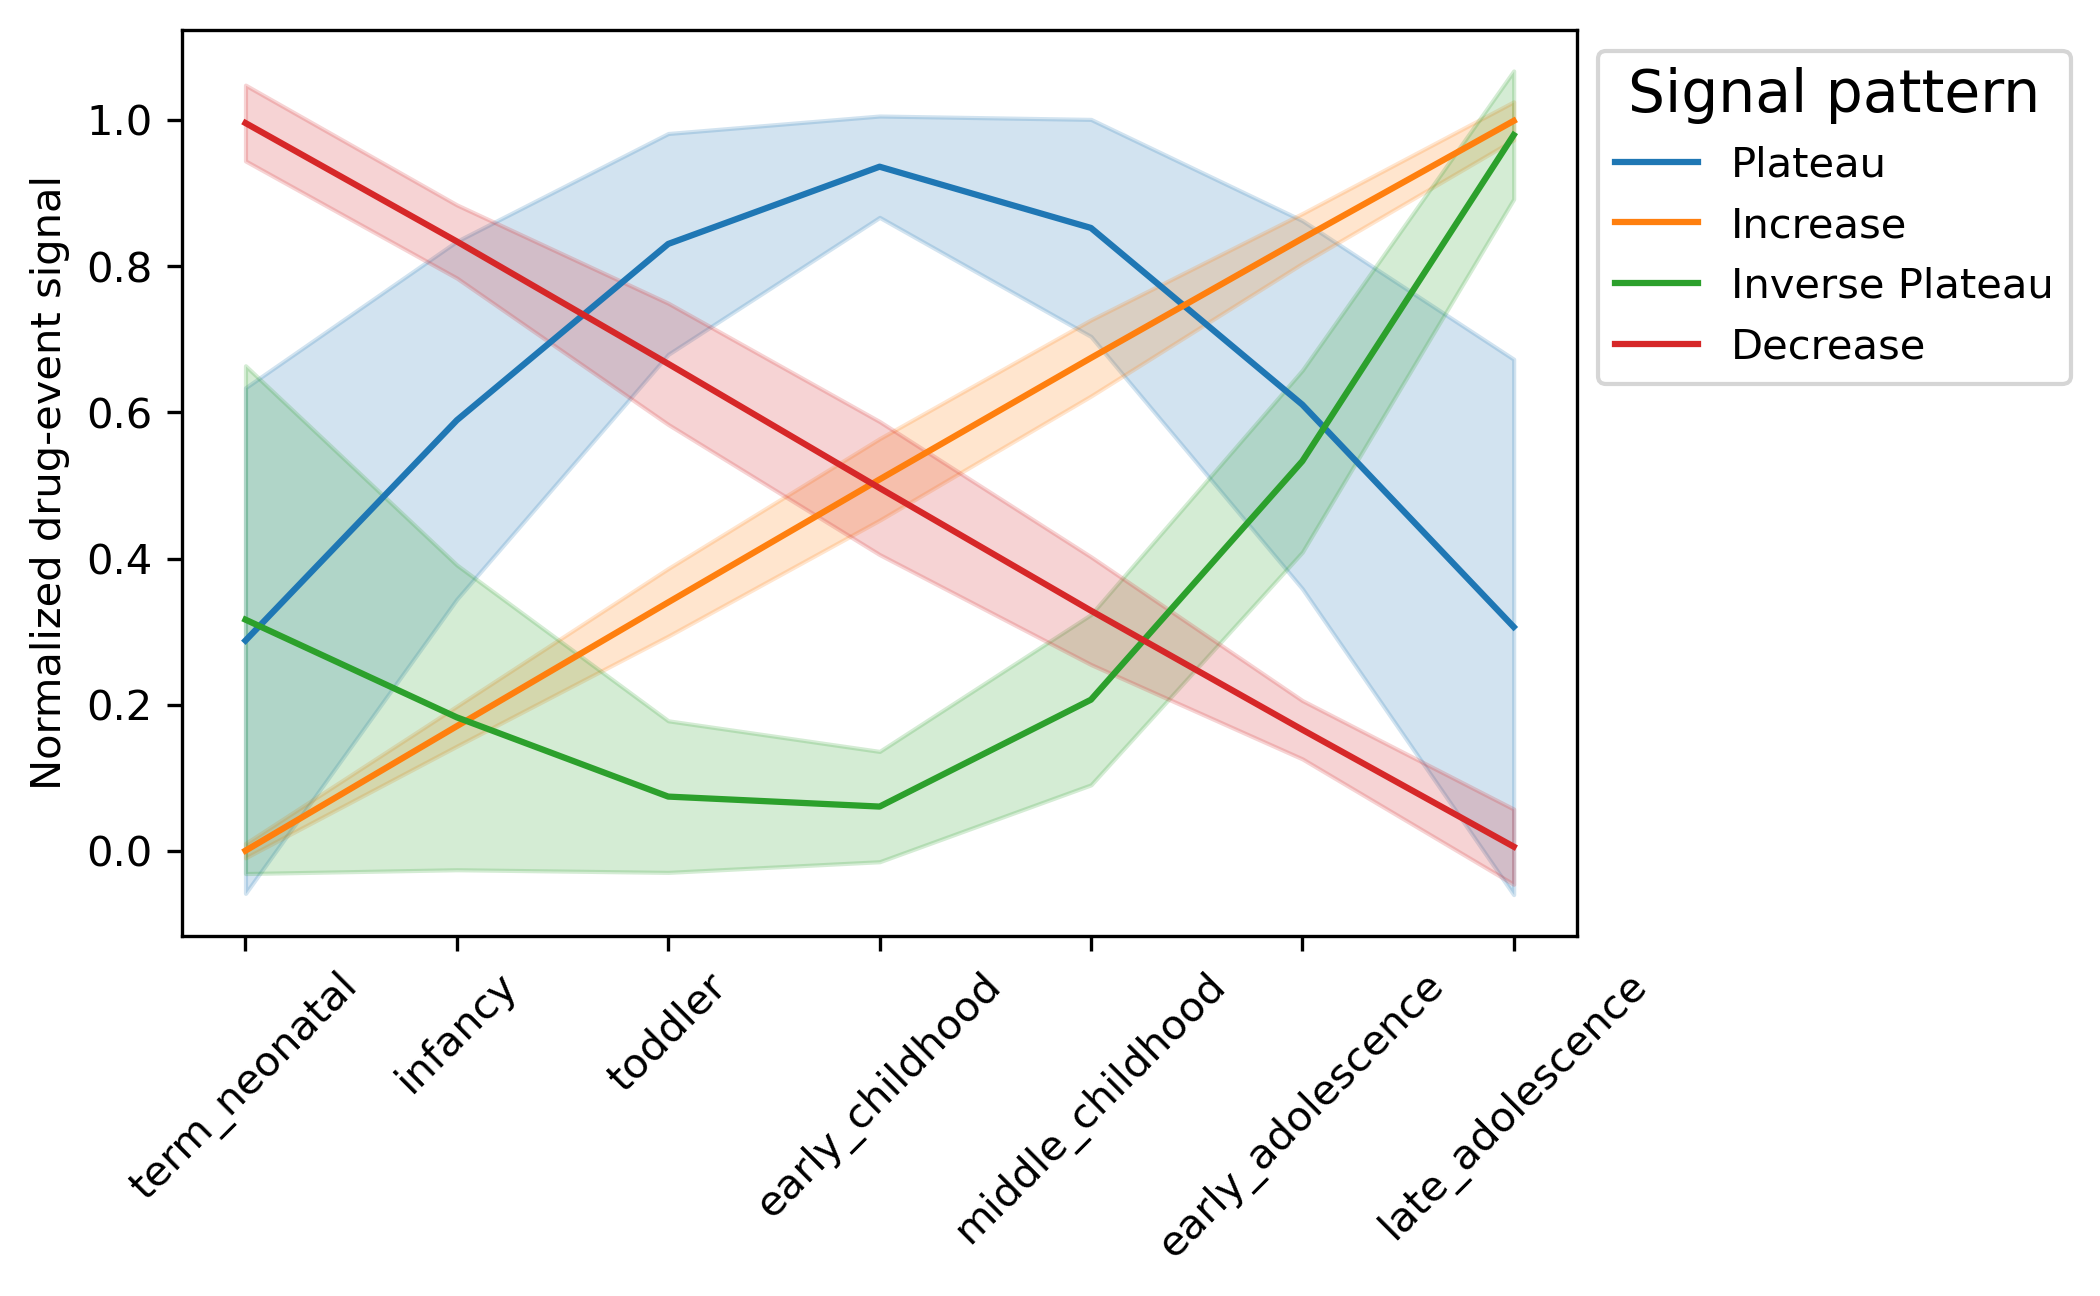

In [74]:
fig,ax = plt.subplots(dpi=300)
sns.lineplot(x='nichd',y='norm',
             ci='sd',
             hue='cluster_id',
             data=plot_dat,
             ax=ax
                 )

plt.legend(bbox_to_anchor=(1, 1), 
           loc='upper left', 
           title='Signal pattern',
           title_fontsize=14,
           labels=['Plateau','Increase','Inverse Plateau',"Decrease"],
           ncol=1)
plt.xticks(rotation = 45)
plt.xlabel('')
plt.ylabel('Normalized drug-event signal')

Closing the database

In [81]:
con.close()